In [2]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np

In [3]:
import sys
print(sys.executable)


/Users/caianqiao/miniconda3/envs/gradio-env/bin/python


In [4]:
pip install ucimlrepo

Note: you may need to restart the kernel to use updated packages.


In [5]:
from ucimlrepo import fetch_ucirepo 
  
cdc_diabetes_health_indicators = fetch_ucirepo(id=891) 

X = cdc_diabetes_health_indicators.data.features 
y = cdc_diabetes_health_indicators.data.targets 

In [6]:
features_df = pd.DataFrame(X, columns=cdc_diabetes_health_indicators.feature_names)
y = pd.DataFrame(cdc_diabetes_health_indicators['data']['targets'], columns=['Diabetes_binary'])
features_df = pd.concat([features_df, y], axis=1)

In [7]:
import sklearn
print(sklearn.__version__)


1.6.1


In [8]:

import sys
!{sys.executable} -m pip install xgboost

!pip install xgboost


import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')


xgb_model.fit(X_train, y_train)


y_pred = xgb_model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 9.6 MB/s eta 0:00:00-:--:--


/Users/caianqiao/miniconda3/envs/gradio-env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [21:09:49] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy: 0.8667612740460423


In [9]:
from sklearn.model_selection import cross_val_score
import numpy as np


xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')


cv_scores = cross_val_score(xgb_model, X, y, cv=10, scoring='accuracy')


print("Cross-validation accuracy scores:", cv_scores)
print("Mean CV accuracy:", np.mean(cv_scores))
print("Standard deviation of CV accuracy:", np.std(cv_scores))

/Users/caianqiao/miniconda3/envs/gradio-env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [21:09:50] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/caianqiao/miniconda3/envs/gradio-env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [21:09:50] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/caianqiao/miniconda3/envs/gradio-env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [21:09:51] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/caianqiao/miniconda3/envs/gradio-env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [21:09:51] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { 

Cross-validation accuracy scores: [0.86648534 0.86538158 0.86727373 0.86025702 0.86451435 0.86412015
 0.86739199 0.86498739 0.86680069 0.86435667]
Mean CV accuracy: 0.8651568905707977
Standard deviation of CV accuracy: 0.002003985050345272


In [10]:
from sklearn.model_selection import GridSearchCV
import xgboost as xgb

# Define parameter grid
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
}


xgb_clf = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')


grid_search = GridSearchCV(estimator=xgb_clf,
                           param_grid=param_grid,
                           scoring='accuracy',
                           cv=5,
                           verbose=1,
                           n_jobs=-1)


grid_search.fit(X, y)


print("Best parameters:", grid_search.best_params_)
print("Best HYPER:", grid_search.best_score_)


Fitting 5 folds for each of 72 candidates, totalling 360 fits


/Users/caianqiao/miniconda3/envs/gradio-env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [21:09:59] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/caianqiao/miniconda3/envs/gradio-env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [21:09:59] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/caianqiao/miniconda3/envs/gradio-env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [21:09:59] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/caianqiao/miniconda3/envs/gradio-env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [21:09:59] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { 

Best parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200, 'subsample': 0.8}
Best HYPER: 0.8670529801324504


In [11]:
from sklearn.model_selection import StratifiedKFold, cross_val_score

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(xgb_model, X, y, cv=skf, scoring='accuracy')
print("Stratified CV accuracy:", cv_scores)


/Users/caianqiao/miniconda3/envs/gradio-env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [21:12:24] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/caianqiao/miniconda3/envs/gradio-env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [21:12:25] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/caianqiao/miniconda3/envs/gradio-env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [21:12:25] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/caianqiao/miniconda3/envs/gradio-env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [21:12:26] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { 

Stratified CV accuracy: [0.86453406 0.86532245 0.86508594 0.86624882 0.86593346]


In [12]:
from sklearn.model_selection import StratifiedKFold, cross_val_score

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(xgb_model, X, y, cv=skf, scoring='accuracy')
print("Stratified CV accuracy:", cv_scores)


/Users/caianqiao/miniconda3/envs/gradio-env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [21:12:26] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/caianqiao/miniconda3/envs/gradio-env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [21:12:27] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/caianqiao/miniconda3/envs/gradio-env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [21:12:27] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/caianqiao/miniconda3/envs/gradio-env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [21:12:28] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { 

Stratified CV accuracy: [0.86453406 0.86532245 0.86508594 0.86624882 0.86593346]


/Users/caianqiao/miniconda3/envs/gradio-env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [21:12:29] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/caianqiao/miniconda3/envs/gradio-env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [21:12:29] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/caianqiao/miniconda3/envs/gradio-env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [21:12:29] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/caianqiao/miniconda3/envs/gradio-env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [21:12:30] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { 

    NumFeatures  Accuracy
0             1  0.862090
1             2  0.862090
2             3  0.862248
3             4  0.862445
4             5  0.862780
5             6  0.862918
6             7  0.866702
7             8  0.867372
8             9  0.867293
9            10  0.867116
10           11  0.867353
11           12  0.867431
12           13  0.867018
13           14  0.867648
14           15  0.868220
15           16  0.867668
16           17  0.866643
17           18  0.867116
18           19  0.866663
19           20  0.866406
20           21  0.866761

 Best number of features: 15.0, Accuracy: 0.8682


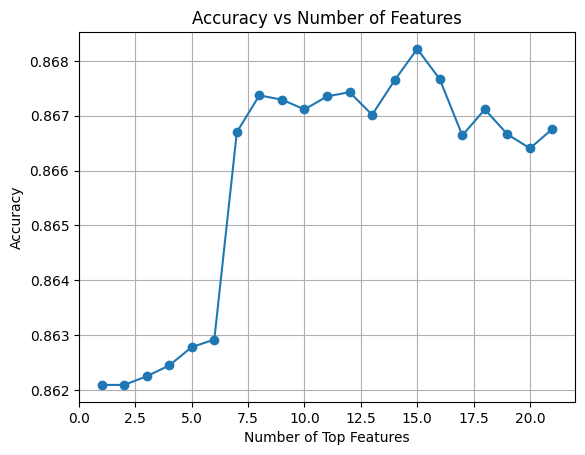

In [13]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
import matplotlib.pyplot as plt


xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X, y)


feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': xgb_model.feature_importances_
}).sort_values(by='Importance', ascending=False)


results = []

for k in range(1, len(X.columns) + 1):
    top_k_features = feature_importance['Feature'].iloc[:k].tolist()
    
    X_selected = X[top_k_features]
    X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)
    
    model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    acc = accuracy_score(y_test, y_pred)
    results.append((k, acc))


results_df = pd.DataFrame(results, columns=['NumFeatures', 'Accuracy'])
print(results_df)


best = results_df.loc[results_df['Accuracy'].idxmax()]
print(f"\n Best number of features: {best['NumFeatures']}, Accuracy: {best['Accuracy']:.4f}")


plt.plot(results_df['NumFeatures'], results_df['Accuracy'], marker='o')
plt.xlabel("Number of Top Features")
plt.ylabel("Accuracy")
plt.title("Accuracy vs Number of Features")
plt.grid(True)
plt.show()


In [14]:
top_14_features = feature_importance['Feature'].iloc[:14].tolist()
print(top_14_features)

['HighBP', 'GenHlth', 'HighChol', 'CholCheck', 'HvyAlcoholConsump', 'Age', 'BMI', 'HeartDiseaseorAttack', 'DiffWalk', 'Sex', 'Stroke', 'Income', 'Education', 'Smoker']


In [15]:
from sklearn.model_selection import RandomizedSearchCV

random_search = RandomizedSearchCV(
    estimator=model,
    param_distributions=param_grid, 
    n_iter=10,                      
    scoring='accuracy',
    cv=3,                             
    verbose=1,
    random_state=42,
    n_jobs=-1
)
random_search.fit(X_train, y_train)
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5],
    'learning_rate': [0.05, 0.1],
    'subsample': [0.8],
    'colsample_bytree': [0.8],
}
from xgboost import XGBClassifier

model = XGBClassifier(
    n_estimators=200,
    max_depth=3,
    learning_rate=0.1,
    colsample_bytree=0.8,
    use_label_encoder=False,
    eval_metric='logloss',       # REQUIRED for early stopping_
)


Fitting 3 folds for each of 10 candidates, totalling 30 fits


/Users/caianqiao/miniconda3/envs/gradio-env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [21:12:37] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/caianqiao/miniconda3/envs/gradio-env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [21:12:37] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/caianqiao/miniconda3/envs/gradio-env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [21:12:37] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/caianqiao/miniconda3/envs/gradio-env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [21:12:37] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { 

In [16]:
X_train = X_train[['HighBP', 'GenHlth', 'HighChol', 'HvyAlcoholConsump', 'CholCheck', 'Age', 'BMI', 'HeartDiseaseorAttack', 'DiffWalk', 'Sex', 'Income', 'Stroke', 'Veggies', 'NoDocbcCost']]

random_search.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


/Users/caianqiao/miniconda3/envs/gradio-env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [21:12:46] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/caianqiao/miniconda3/envs/gradio-env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [21:12:46] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/caianqiao/miniconda3/envs/gradio-env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [21:12:46] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/caianqiao/miniconda3/envs/gradio-env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [21:12:46] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { 

RandomizedSearchCV(cv=3,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric='logloss',
                                           feature_types=None, gamma=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning...
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           multi_strategy=None,
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None,
                                           random_state=42, ...),
                   n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.8, 1.0],
                                        'learning_rate': [0.01, 0.1, 0.2],
                                        'max_depth': [3, 5, 7],
                                        'n_estimators': [100, 200],
                                        'subsample': [0.8, 1.0]},
                   random_state=42, scoring='accuracy', verbose=1)

In [17]:
from sklearn.metrics import accuracy_score

# Get the best model from the random search
best_model = random_search.best_estimator_

# Make predictions on test set


In [19]:
import gradio as gr
import numpy as np
import joblib

# 加载14-feature模型
best_model = joblib.load("best_model_14.pkl")

# 预测函数
def predict_diabetes(
    HighBP, GenHlth, HighChol, HvyAlcoholConsump, CholCheck,
    Age, BMI, HeartDiseaseorAttack, DiffWalk, Sex,
    Income, Stroke, Veggies, NoDocbcCost
):  
    try:
        age_num = int(Age.split(" ")[0])
        income_num = int(Income.split(" ")[0])
        Sex_binary = 1 if Sex == "Male" else 0
        x = np.array([
            HighBP, GenHlth, HighChol, HvyAlcoholConsump, CholCheck,
            age_num, int(BMI), HeartDiseaseorAttack, DiffWalk, Sex_binary,
            income_num, Stroke, Veggies, NoDocbcCost
        ]).reshape(1, -1)
        prob = best_model.predict_proba(x)[0, 1]
        return f"{prob:.2%} likelihood of developing diabetes"
    except Exception as e:
        return f"Error: {str(e)}"

# Gradio界面组件
inputs = [
    gr.Radio([0, 1], label="High Blood Pressure (0=No, 1=Yes)"),
    gr.Slider(1, 5, step=1, label="General Health (1=Excellent ~ 5=Poor)"),
    gr.Radio([0, 1], label="High Cholesterol (0=No, 1=Yes)"),
    gr.Radio([0, 1], label="Heavy Alcohol Consumption (0=No, 1=Yes)"),
    gr.Radio([0, 1], label="Cholesterol Check in Last 5 Years (0=No, 1=Yes)"),
    gr.Radio([
        "1 (18–24)", "2 (25–29)", "3 (30–34)", "4 (35–39)",
        "5 (40–44)", "6 (45–49)", "7 (50–54)", "8 (55–59)",
        "9 (60–64)", "10 (65–69)", "11 (70–74)", "12 (75–79)", "13 (80+)"
    ], label="Age Category"),
    gr.Slider(10, 60, step=1, label="BMI (Integer)"),
    gr.Radio([0, 1], label="Heart Disease or Heart Attack (0=No, 1=Yes)"),
    gr.Radio([0, 1], label="Difficulty Walking (0=No, 1=Yes)"),
    gr.Radio(["Female", "Male"], label="Sex"),
    gr.Radio([
        "1 (<$10,000)", "2 ($10,000–$15,000)", "3 ($15,000–$20,000)",
        "4 ($20,000–$25,000)", "5 ($25,000–$35,000)", "6 ($35,000–$50,000)",
        "7 ($50,000–$75,000)", "8 ($75,000+)"
    ], label="Income Level"),
    gr.Radio([0, 1], label="Ever Had Stroke (0=No, 1=Yes)"),
    gr.Radio([0, 1], label="Eat Vegetables Daily (0=No, 1=Yes)"),
    gr.Radio([0, 1], label="Could Not See Doctor Due to Cost (0=No, 1=Yes)")
]

# 启动 Gradio（Jupyter 中用 inline_display）
gr.Interface(fn=predict_diabetes, inputs=inputs, outputs="text",
             title="Diabetes Risk Predictor",
             description="Enter your health information to estimate your risk of developing diabetes."
            ).launch(inline=True)







/Users/caianqiao/miniconda3/envs/gradio-env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [21:41:19] WARNING: /Users/runner/work/xgboost/xgboost/src/gbm/../common/error_msg.h:80: If you are loading a serialized model (like pickle in Python, RDS in R) or
configuration generated by an older version of XGBoost, please export the model by calling
`Booster.save_model` from that version first, then load it back in current version. See:

    https://xgboost.readthedocs.io/en/stable/tutorials/saving_model.html

for more details about differences between saving model and serializing.

  warnings.warn(smsg, UserWarning)


Running on local URL:  http://127.0.0.1:7861

To create a public link, set `share=True` in `launch()`.
